In [1]:
!nvidia-smi

Tue Nov 15 06:04:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!pip install -Uqq duckduckgo_search

In [8]:
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *

In [9]:
def search_images(term, max_images=200):
  return L(ddg_images(term, max_results=max_images)).itemgot('image')


In [10]:
searches = 'aeroplane', 'train', 'bus', 'car', 'bike'
path = Path('vehicles')
from time import sleep

for o in searches:
  dest = (path/o)
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images(f'{o} photo'))
  sleep(10)
  download_images(dest, urls=search_images(f'{o} bright photo'))
  sleep(10)
  download_images(dest, urls=search_images(f'{o} colorful photo'))
  sleep(10)
  resize_images(path/o, max_size=400, dest=path/o)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [11]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

54

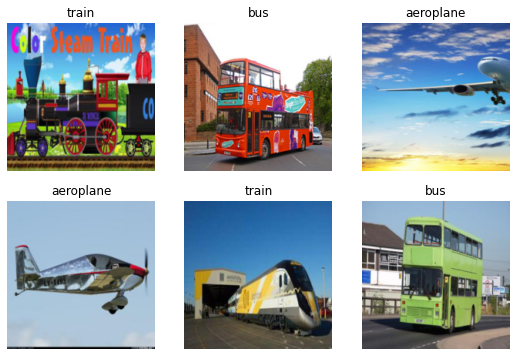

In [12]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n = 6)

In [13]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.922412,0.229531,0.072333,00:23


epoch,train_loss,valid_loss,error_rate,time
0,0.208160,0.208737,0.079566,00:18
1,0.111182,0.179209,0.061483,00:15
2,0.063920,0.157310,0.057866,00:13


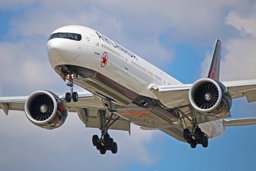

In [17]:
urls = search_images('plane photos', max_images=1)
dest='plane.jpg'
download_url(urls[0], dest, show_progress=True)
im = Image.open(dest)
im.to_thumb(256,256)

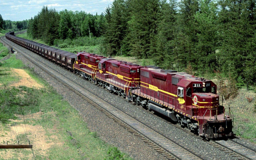

In [18]:
urls = search_images('train photos', max_images=1)
dest='train.jpg'
download_url(urls[0], dest, show_progress=True)
im = Image.open(dest)
im.to_thumb(256,256)

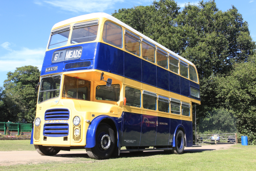

In [19]:
urls = search_images('bus photos', max_images=1)
dest='bus.jpg'
download_url(urls[0], dest, show_progress=True)
im = Image.open(dest)
im.to_thumb(256,256)

In [ ]:
urls = search_images('bike photos', max_images=1)
dest='bike.jpg'
download_url(urls[0], dest, show_progress=True)
im = Image.open(dest)
im.to_thumb(256,256)

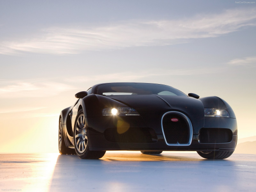

In [20]:
urls = search_images('car photos', max_images=1)
dest='car.jpg'
download_url(urls[0], dest, show_progress=True)
im = Image.open(dest)
im.to_thumb(256,256)

In [22]:
is_vehicle,_,probs=learn.predict(PILImage.create('car.jpg'))
print(f"This is a: {is_vehicle}.")
print(f"Probability it's a plane: {probs[0]:.4f}")

This is a: car.
Probability it's a plane: 0.0000
